# Exploring relationships

#### Table of Contents

    1. Importing libraries
    2. Importing data
    3. Visualizing relationships
        3.1 Correlation heatmap
        3.2 Scatterplots
            WorldRiskIndex vs. Exposure (0.92)
            Vulnerability vs. Susceptibility (0.94)
            Vulnerability vs. Lack of Coping Capacities (0.93)
            Vulnerability vs. Lack of Adaptive Capacities (0.95)
        3.3 Pair plot
        3.4 Categorical plots
            WorldRiskIndex vs. Susceptibility
            Vulnerability vs. Susceptibility
            WorldRiskIndex vs. Vulnerability
    4. Discussions
        Research Questions
        Additional Questions
        Hypotheses

# 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

# 2. Importing data

In [2]:
# Turn project folder path into a string
path = r'/Users/sarahtischer/Desktop/CareerFoundry/Data Immersion/Achievement 6/03-2024_WorldRiskIndex_Analysis'

In [3]:
# Import "WRI_clean.csv"
df = pd.read_csv(os.path.join(path, '02_Data', 'Prepared_data', 'WRI_clean.csv'), index_col = False)

In [4]:
# Confirm the shape of the dataset
df.shape

(1917, 12)

#### Creating a subset

In [5]:
# Create a subset for continuous variables
df_cont = df[
    ['WRI', 'Exposure', 'Vulnerability', 'Susceptibility',
     'Lack of Coping Capacities', 'Lack of Adaptive Capacities']
]

In [6]:
# Check the output
df_cont.head()

,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capacities,Lack of Adaptive Capacities
0,32.00,56.33,56.81,37.14,79.34,53.96
1,29.08,56.04,51.90,28.94,81.80,44.97
2,24.32,45.09,53.93,34.99,82.78,44.01
3,23.51,36.40,64.60,44.11,85.95,63.74
4,20.88,38.42,54.35,35.36,77.83,49.87


# 3. Visualizing relationships

## 3.1 Correlation heatmap

In [7]:
# Create a correlation matrix
df_cont.corr()

,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capacities,Lack of Adaptive Capacities
WRI,1.000000,0.917488,0.445140,0.380923,0.458327,0.413403
Exposure,0.917488,1.000000,0.106925,0.065290,0.147847,0.087742
Vulnerability,0.445140,0.106925,1.000000,0.935944,0.930961,0.945379
Susceptibility,0.380923,0.065290,0.935944,1.000000,0.784190,0.838044
Lack of Coping Capacities,0.458327,0.147847,0.930961,0.784190,1.000000,0.833058
Lack of Adaptive Capacities,0.413403,0.087742,0.945379,0.838044,0.833058,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

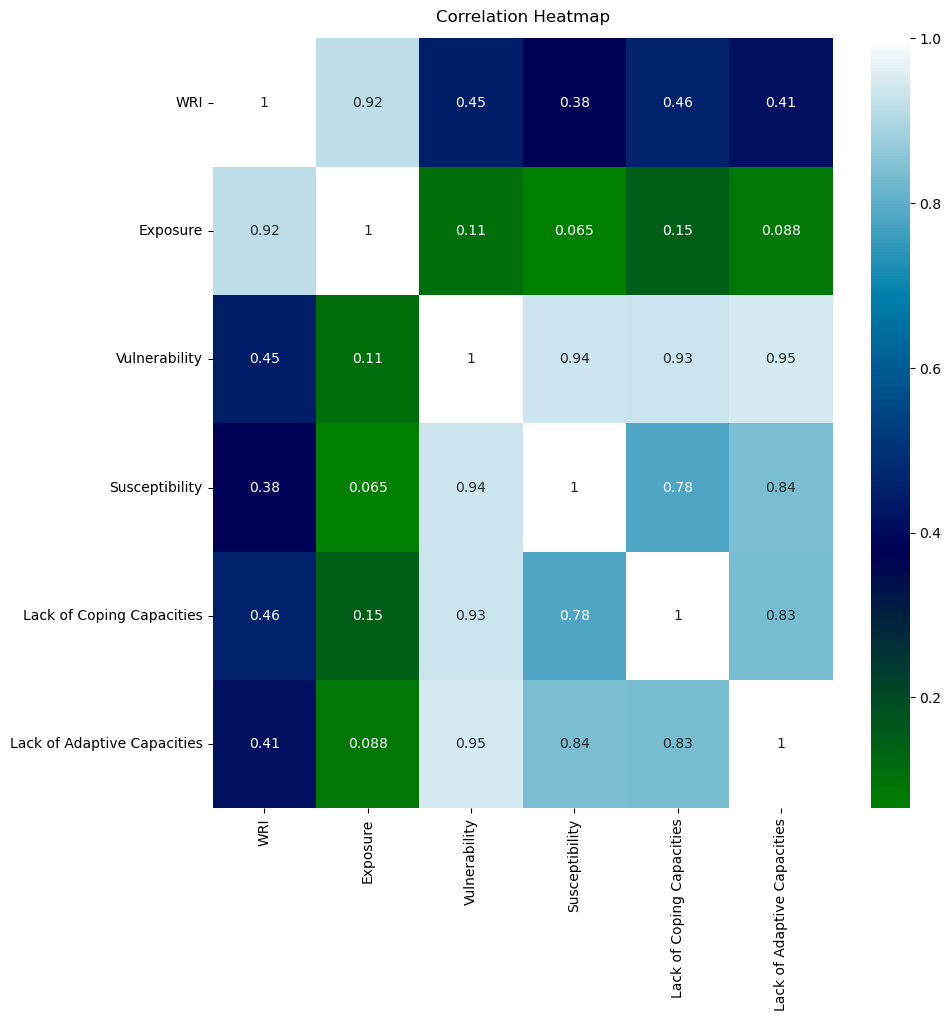

In [8]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Plot a correlation heatmap
heat_corr = sns.heatmap(df_cont.corr(), annot=True, cmap='ocean', ax=ax)

# Set a title
heat_corr.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [9]:
# Export heatmap
heat_corr.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', '2_heat_corr.png'), bbox_inches='tight')

#### <mark>Interpretation:</mark>

Exposure, as a component of the WorldRiskIndex, is strongly correlated with the WRI, reinforcing the notion that **exposure to natural hazards is a primary determinant** of overall risk. Vulnerability, Susceptibility, Lack of Coping Capacities, and Lack of Adaptive Capacities have weaker correlations with Exposure, but still show significant associations with the WRI, highlighting the importance of societal vulnerability and resilience factors in shaping overall risk profiles. In other words, countries with higher levels of vulnerability may experience heightened risk even if their exposure levels are not as pronounced.

The weak correlations between Exposure and variables other than the WRI imply that **exposure to natural hazards does not necessarily correlate with higher levels of societal vulnerability**. For example, a country may be highly exposed to earthquakes or floods but may have strong infrastructure and societal systems in place to mitigate the impacts, resulting in lower vulnerability despite high exposure.

The strong positive correlations between Vulnerability, Susceptibility, Lack of Coping Capacities, and Lack of Adaptive Capacities underscore their **interconnectedness and collective impact on overall risk levels**. This suggests that countries with higher levels of societal vulnerability and lack of coping and adaptive capacities are more likely to experience increased risk from natural disasters and adverse climate change impacts.

In summary, the WorldRiskIndex shows the strongest association with Exposure, followed by moderate associations with Vulnerability, Susceptibility, Lack of Coping Capacities, and Lack of Adaptive Capacities. This suggests that exposure to natural hazards plays a significant role in determining overall risk, while societal vulnerability, and coping and adaptive capacities also contribute, albeit to a lesser extent.

## 3.2 Scatterplots

#### WorldRiskIndex vs. Exposure (0.92)

/Users/sarahtischer/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'WRI vs. Exposure Scatterplot')

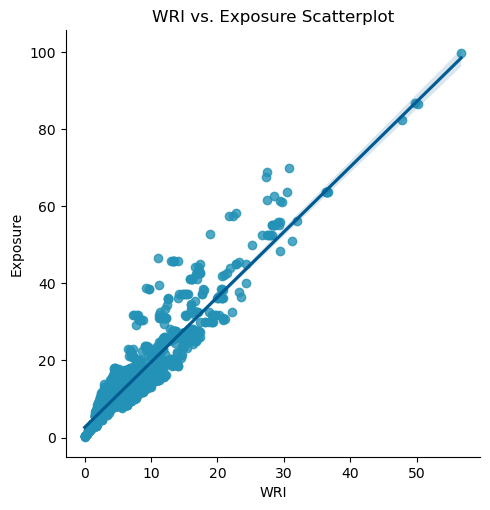

In [10]:
# Create a scatterplot
scat_wri_exp = sns.lmplot(
    x='WRI', y='Exposure', data=df_cont, 
    scatter_kws={'color': '#2492b6'}, line_kws={'color': '#005b92'}
)

# Set a title
plt.title('WRI vs. Exposure Scatterplot')

In [11]:
# Export scatterplot
scat_wri_exp.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', '2_scat_wri_exp.png'), bbox_inches='tight')

#### <mark>Interpretation:</mark>

The scatterplot confirms the expected **strong positive and linear correlation between WRI and Exposure**. This indicates that as exposure to natural hazards increases, the overall level of risk, as measured by the WRI, tends to increase in a predictable manner.

The **majority of data points clustered in the lower third** of both WRI (< 20) and Exposure (< 30) suggest that the majority of countries have relatively low levels of risk and exposure to natural hazards. This distribution underscores the importance of addressing even lower levels of risk to ensure comprehensive disaster risk management.

The observed **increase in variance in the middle third** of the trend line, particularly from a WRI score of around 10 and an Exposure score of around 30, suggests that as risk and exposure levels escalate beyond certain thresholds, the variability in their relationship becomes more pronounced. This may indicate that different socioeconomic, geographic, or environmental factors influence risk profiles in this range.

The **limited number of data points above a WRI score of 45 and an Exposure score of 80** suggests that extreme levels of risk and exposure are relatively rare globally. However, it is important to examine these outliers as they may represent regions facing severe and unique challenges that require targeted intervention and support.

The **steepness of the trend line and the proximity of the data points** to this line indicate a strong association between WRI and Exposure, with minimal deviation from the expected relationship. This suggests that while there is variability, there is a consistent and predictable trend linking exposure to natural hazards to overall risk levels as measured by the WRI.

#### Vulnerability vs. Susceptibility (0.94)

/Users/sarahtischer/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Vulnerability vs. Susceptibility Scatterplot')

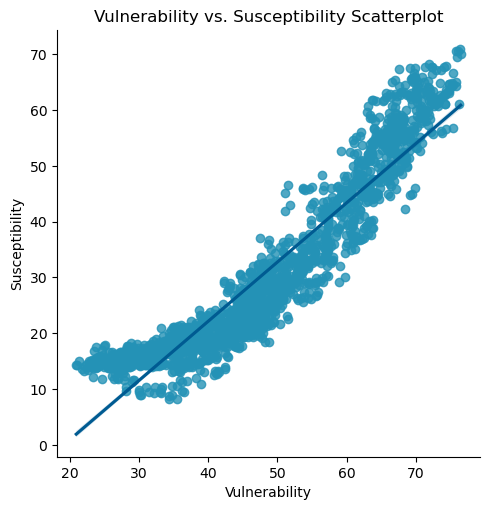

In [12]:
# Create a scatterplot
scat_vul_sus = sns.lmplot(
    x='Vulnerability', y='Susceptibility', data=df_cont, 
    scatter_kws={'color': '#2492b6'}, line_kws={'color': '#005b92'}
)

# Set a title
plt.title('Vulnerability vs. Susceptibility Scatterplot')

In [13]:
# Export scatterplot
scat_vul_sus.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', '2_scat_vul_sus.png'), bbox_inches='tight')

#### Vulnerability vs. Lack of Coping Capacities (0.93)

/Users/sarahtischer/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Vulnerability vs. Lack of Coping Capacities Scatterplot')

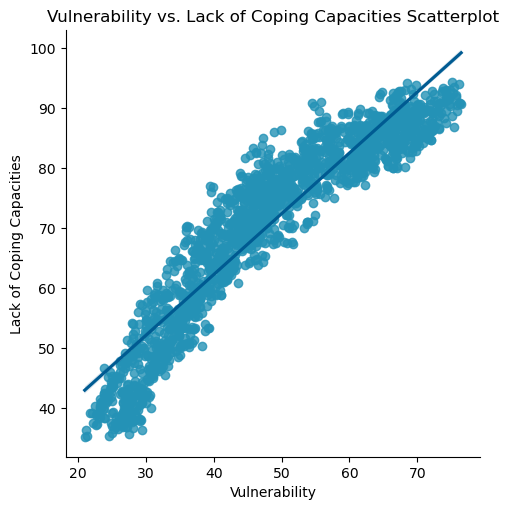

In [14]:
# Create a scatterplot
scat_vul_cop = sns.lmplot(
    x='Vulnerability', y='Lack of Coping Capacities', data=df_cont, 
    scatter_kws={'color': '#2492b6'}, line_kws={'color': '#005b92'}
)

# Set a title
plt.title('Vulnerability vs. Lack of Coping Capacities Scatterplot')

In [15]:
# Export scatterplot
scat_vul_cop.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', '2_scat_vul_cop.png'), bbox_inches='tight')

#### Vulnerability vs. Lack of Adaptive Capacities (0.95)

/Users/sarahtischer/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Vulnerability vs. Lack of Adaptive Capacities Scatterplot')

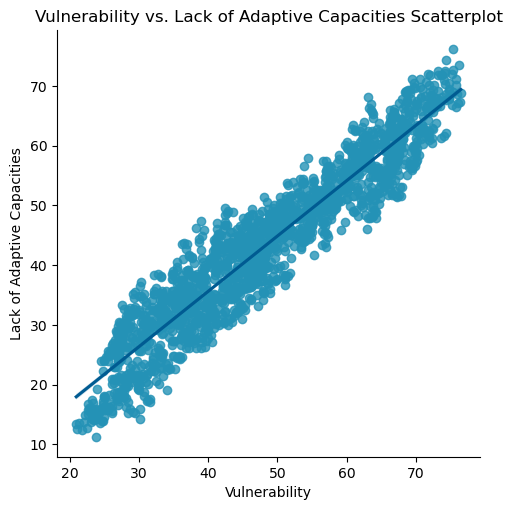

In [16]:
# Create a scatterplot
scat_vul_adap = sns.lmplot(
    x='Vulnerability', y='Lack of Adaptive Capacities', data=df_cont, 
    scatter_kws={'color': '#2492b6'}, line_kws={'color': '#005b92'}
)

# Set a title
plt.title('Vulnerability vs. Lack of Adaptive Capacities Scatterplot')

In [17]:
# Export scatterplot
scat_vul_adap.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', '2_scat_vul_adap.png'), bbox_inches='tight')

#### <mark>Interpretation:</mark>

**Vulnerability vs. Susceptibility:**
* Observations: The scatterplot shows a monotonic but non-linear trend that is slightly skewed to the left. Initially, Susceptibility rises less steeply, but accelerates significantly in regions of higher Vulnerability.
* Implications: As Vulnerability increases, so does Susceptibility, indicating an increased risk of damage from natural events. Addressing Susceptibility factors is critical to reducing vulnerability and disaster risk.

**Vulnerability vs. Lack of Coping Capacities:**
* Observations: The scatterplot also shows a monotonic but non-linear trend, but with a slightly right-sloping curve. Lack of Coping Capacities increases more at lower levels of Vulnerability, but the rate slows as Vulnerability worsens.
* Implications: Increasing Vulnerability correlates with a greater increase in Lack of Coping Capacities. Improving coping capacities, even in regions with lower overall Vulnerability, is essential to minimize losses from natural hazards.

**Vulnerability vs. Lack of Adaptive Capacities:**
* Observations: The scatterplot shows a strong positive linear relationship. Higher Vulnerability is associated with greater Lack of Adaptive Capacity.
* Implications: Regions with higher Vulnerability tend to have limited adaptive capacity, increasing the risk of damage from natural events and climate change impacts. Investing in long-term strategies to increase adaptive capacity is critical to reducing Vulnerability and promoting resilience.

## 3.3 Pair plot

/Users/sarahtischer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sarahtischer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sarahtischer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sarahtischer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

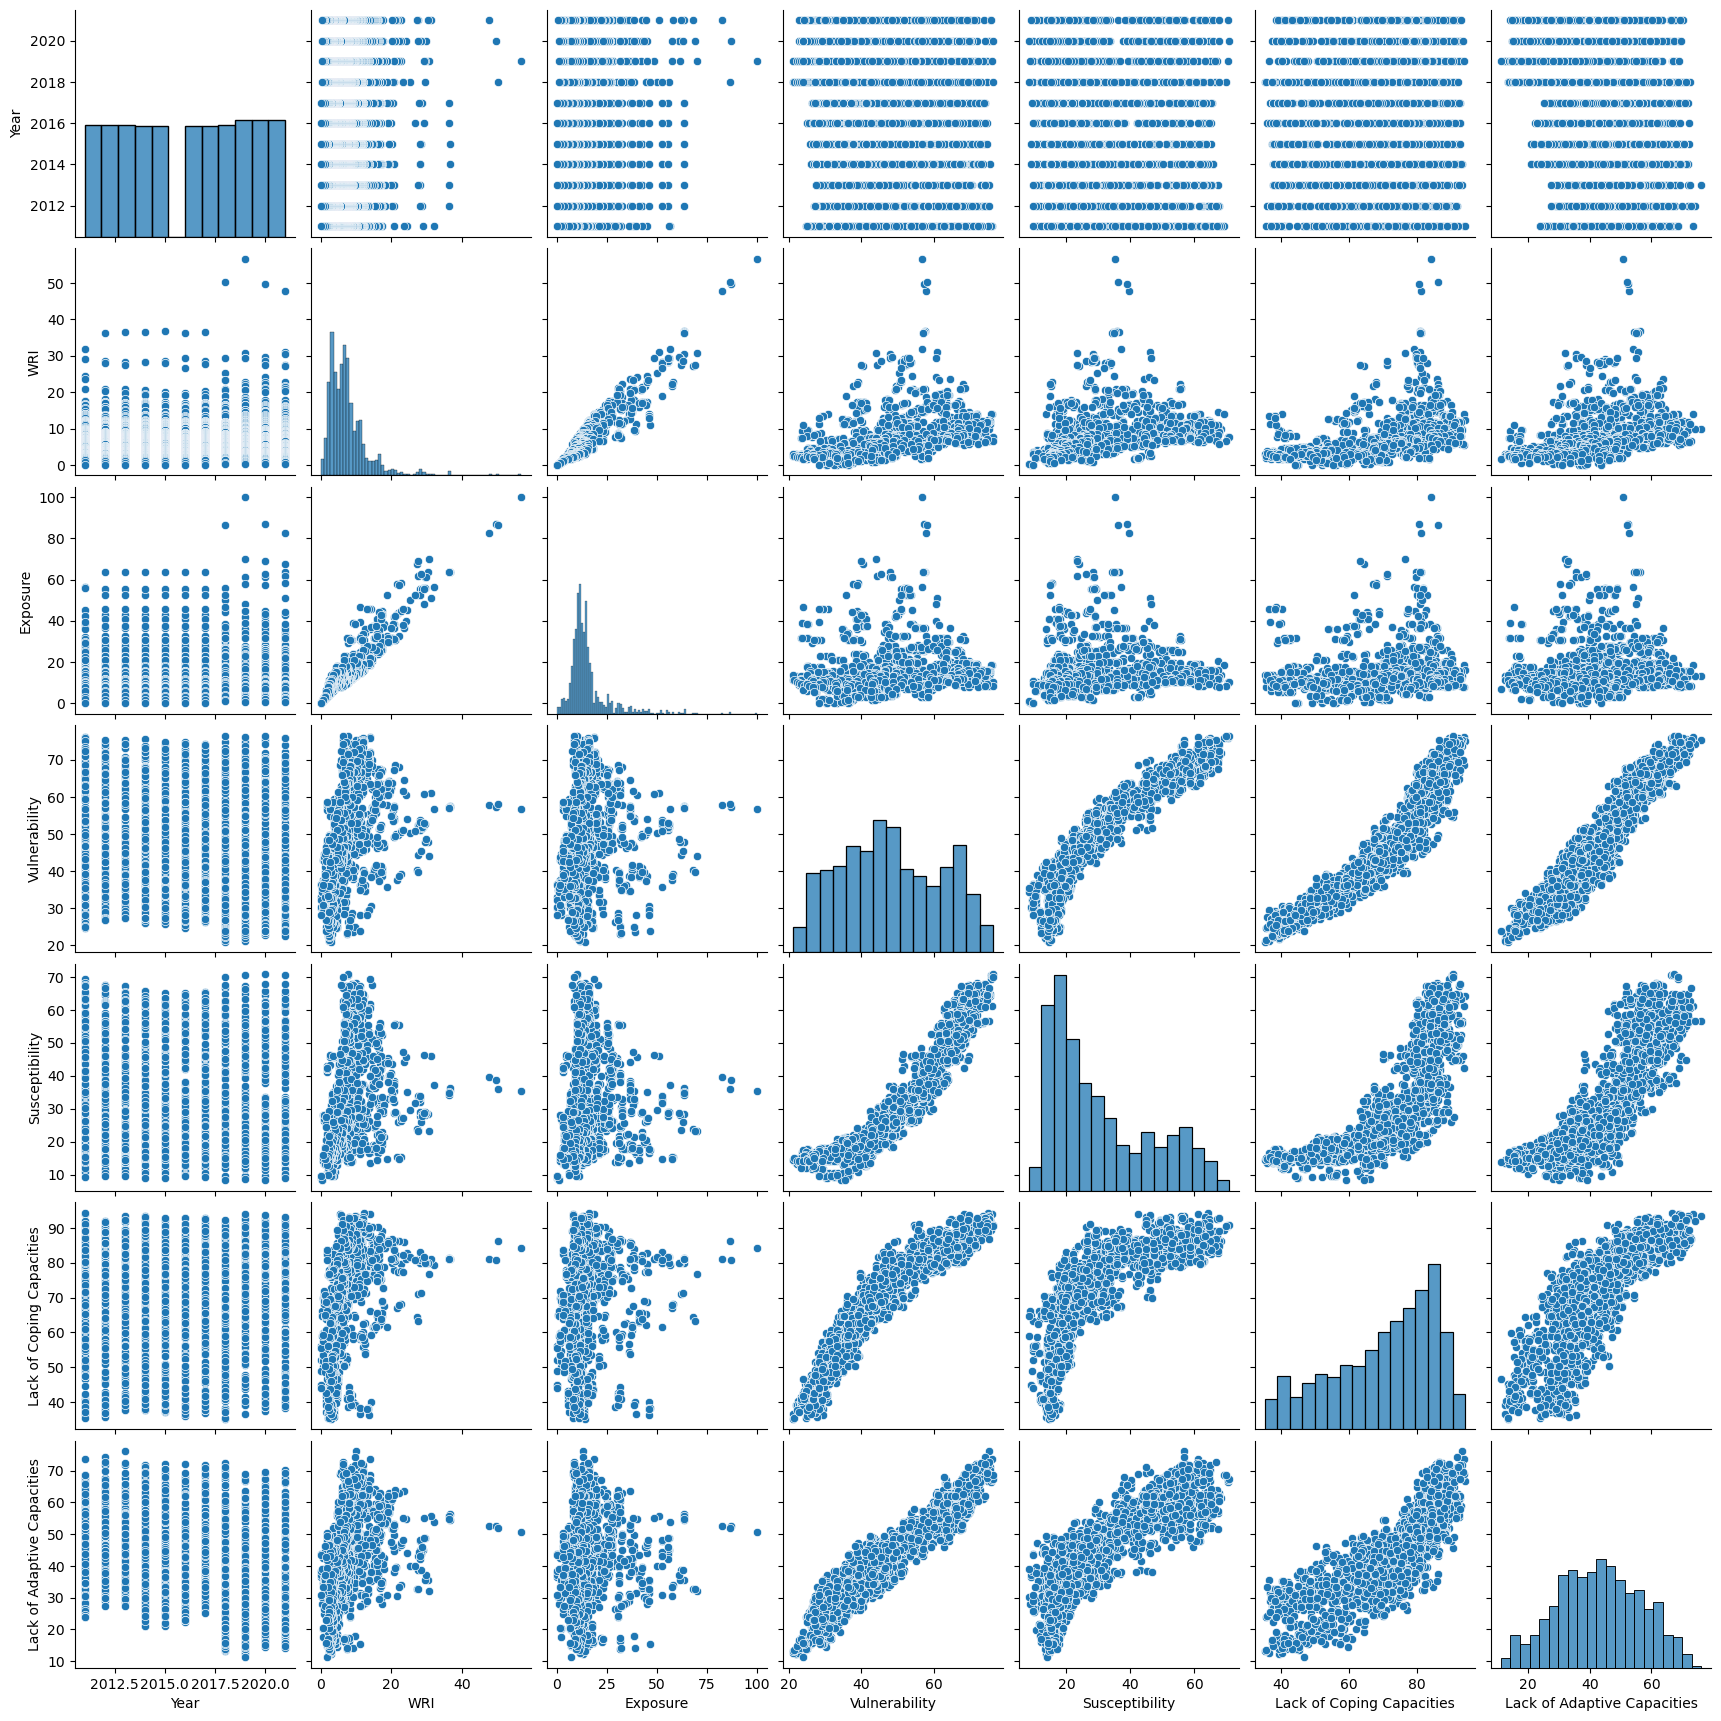

In [18]:
# Create a pair plot of the entire data set
pair = sns.pairplot(df)

In [19]:
# Export pair plot
pair.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', '2_pair.png'), bbox_inches='tight')

#### <mark>Interpretation:</mark>

**WRI/Exposure scatterplots:**
* Interestingly, the plots of WRI and Exposure crossed with Vulnerability and its sub-variables show quite similar patterns and trends, while their correlation strengths differ. The coefficients of the WRI and Vulnerability variables indicate moderate relationships, while the coefficients of the Exposure and Vulnerability variables indicate weak relationships. 
* The pair plot shows that the correlations between these variables are affected by an overall high degree of variability and some potential outliers that appear to be more significant in correlation with the WRI.
* It would therefore be interesting to investigate why there is such variance and what causes the outliers.

**Vulnerability-related scatterplots:**
* All individual plots of the vulnerability-related variables, i.e., Susceptibility, Lack of Coping Capacities, and Lack of Adaptive Capacities, show similar patterns to those observed for the relationship with vulnerability in general. That is, monotonic but non-linear trends.

___

**WRI (WorldRiskIndex):**
* Right-skewed distribution: The right-skewed distribution of the WRI suggests that most countries have lower overall risk levels, indicating relatively lower exposure and vulnerability to natural hazards. However, there are fewer countries with extremely high risk levels, highlighting regions that face severe challenges in terms of exposure and vulnerability.

**Exposure:**
* Right-skewed distribution: Similarly, the right-skewed distribution of exposure indicates that most countries have lower levels of exposure to natural hazards, with fewer countries facing extremely high levels of exposure. Further research could focus on identifying specific types of natural hazards that contribute to high exposure levels and assessing their impact on overall risk levels.

**Vulnerability:**
* (Potentially) Bimodal distribution: The bimodal distribution of vulnerability indicates the presence of distinct subgroups with different levels of vulnerability. Further exploration of the factors contributing to each peak can improve understanding of societal vulnerability and inform tailored risk reduction strategies.

**Susceptibility:**
* (Potentially) Bimodal distribution: Similarly, the bimodal distribution of susceptibility suggests the existence of distinct subgroups with different levels of susceptibility to natural hazards. Exploring the factors that contribute to each peak can provide insights into the structural characteristics and societal conditions that influence susceptibility, facilitating targeted risk reduction interventions.

**Lack of Coping Capacity:**
* Left-skewed distribution: The left-skewed distribution of lack of coping capacity suggests that most countries have higher scores, indicating a greater lack of coping mechanisms. This highlights the challenges of mitigating the immediate effects of natural disasters and climate-related events, and underscores the need for improved coping strategies.

**Lack of Adaptive Capacity:**
* Normal distribution: The normal distribution of lack of adaptive capacity indicates variability in long-term adaptation processes and strategies across countries. Further research could examine the effectiveness of adaptation measures in increasing resilience and reducing vulnerability to future adverse impacts.

**Variables to explore further:**
* Given the (potentially) bimodal distributions of Susceptibility and Vulnerability, exploring the factors that contribute to each peak can provide valuable insights into the structural characteristics, societal conditions, and vulnerabilities that influence disaster risk. Understanding the different subgroups within these distributions allows for targeted interventions to reduce risk and increase resilience.

## 3.4 Categorical plots

#### WorldRiskIndex vs. Susceptibility

/Users/sarahtischer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sarahtischer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sarahtischer/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'WorldRiskIndex vs. Susceptibility Categorical Plot')

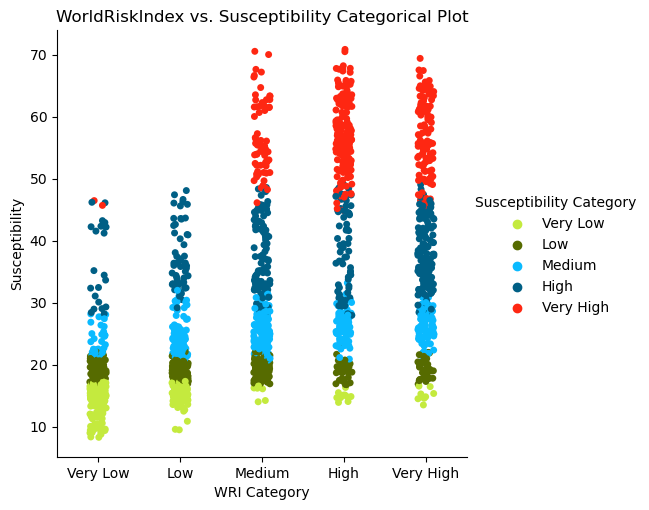

In [20]:
custom_palette=['#C4EA3E', '#566B00', '#0ABAFF', '#005F85', '#FE2712'] #red #darkbl #lightbl #darkgr #lightgr

# Create a categorical plot
cat_wri_sus = sns.catplot(
    x='WRI Category', y='Susceptibility', hue='Susceptibility Category', 
    order=['Very Low', 'Low', 'Medium', 'High', 'Very High'], 
    hue_order=['Very Low', 'Low', 'Medium', 'High', 'Very High'], 
    data=df, palette=custom_palette
)

# Set a title
plt.title('WorldRiskIndex vs. Susceptibility Categorical Plot')

In [21]:
# Export categorical plot
cat_wri_sus.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', '2_cat_wri_sus.png'), bbox_inches='tight')

#### Vulnerability vs. Susceptibility

/Users/sarahtischer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sarahtischer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sarahtischer/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Vulnerability vs. Susceptibility Categorical Plot')

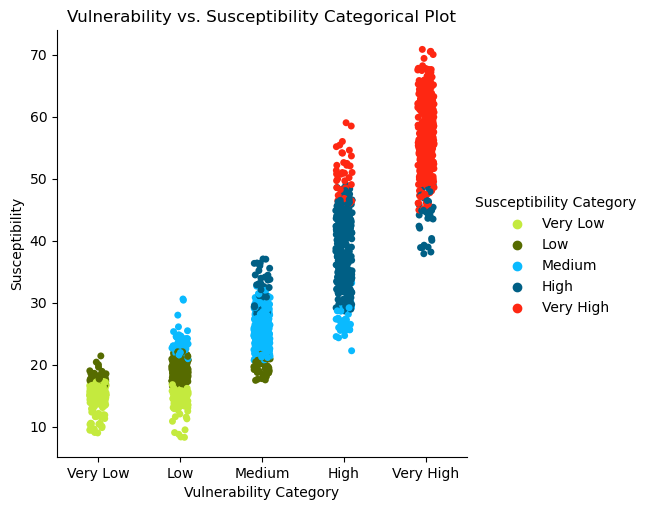

In [22]:
# Create a categorical plot
cat_vul_sus = sns.catplot(
    x='Vulnerability Category', y='Susceptibility', hue='Susceptibility Category', 
    order=['Very Low', 'Low', 'Medium', 'High', 'Very High'], 
    hue_order=['Very Low', 'Low', 'Medium', 'High', 'Very High'], 
    data=df, palette=custom_palette
)

# Set a title
plt.title('Vulnerability vs. Susceptibility Categorical Plot')

In [23]:
# Export categorical plot
cat_vul_sus.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', '2_cat_vul_sus.png'), bbox_inches='tight')

#### WorldRiskIndex vs. Vulnerability

/Users/sarahtischer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sarahtischer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sarahtischer/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'WorldRiskIndex vs. Vulnerability Categorical Plot')

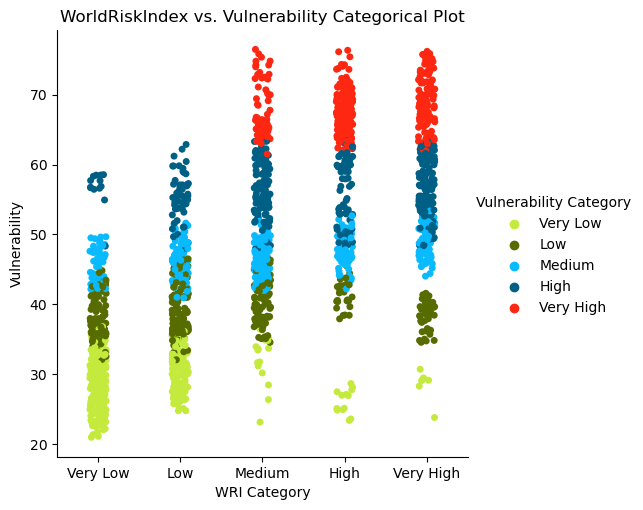

In [24]:
# Create a categorical plot
cat_wri_vul = sns.catplot(
    x='WRI Category', y='Vulnerability', hue='Vulnerability Category', 
    order=['Very Low', 'Low', 'Medium', 'High', 'Very High'], 
    hue_order=['Very Low', 'Low', 'Medium', 'High', 'Very High'], 
    data=df, palette=custom_palette
)

# Set a title
plt.title('WorldRiskIndex vs. Vulnerability Categorical Plot')

In [25]:
# Export categorical plot
cat_wri_vul.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', '2_cat_wri_vul.png'), bbox_inches='tight')

#### <mark>Interpretation:</mark>

**WorldRiskIndex vs. Susceptibility:**
* The even distribution of low to high Susceptibility scores across the WRI categories suggests that vulnerability to natural disasters is not only determined by structural characteristics and societal conditions, but is also influenced by exposure to natural hazards.
* Outliers, where countries have very low WRI but very high Susceptibility, could indicate either minimal exposure to natural hazards or exceptional coping and adaptive capacity. Further analysis of these outliers could help to understand their resilience mechanisms.
* Conversely, countries with very low Susceptibility but a medium to very high overall risk index may be extremely exposed to natural hazards. This underscores the importance of considering both susceptibility and exposure when assessing disaster risk.

**Vulnerability vs. Susceptibility:**
* The equal distribution of Vulnerability and Susceptibility suggests a close relationship between structural characteristics and societal conditions that increase vulnerability and susceptibility to natural disasters. Countries with lower susceptibility tend to have lower vulnerability, indicating a correlation between societal factors and susceptibility to natural hazards.

**WorldRiskIndex vs. Vulnerability:**
* The presence of countries with very low to low Vulnerability but medium to very high overall risk indexes underscores the dominant role of exposure to natural hazards in determining a country's risk level. This suggests that even countries with relatively strong social conditions may face significant risk due to high exposure to natural disasters.
* Conversely, countries with high vulnerability but a very low to low overall risk index may be less exposed to natural hazards due to their geographic location or other factors. This highlights the complex interplay between vulnerability and exposure in determining disaster risk.

# 4. Discussions

### Research Questions

The only research question that can be answered at this point is ***"How do the different criteria (exposure, vulnerability, susceptibility, etc.) contribute to WorldRiskIndex? Are there specific criteria that impact the final index more than others?"***:

The different criteria contribute to the WorldRiskIndex in different ways, with **Exposure to natural hazards emerging as a primary determinant of overall risk**. However, Exposure doesn't always correlate directly with higher levels of societal vulnerability, indicating other influencing factors. The relationship becomes **more complex as risk and Exposure levels escalate beyond certain thresholds**, suggesting socioeconomic, geographic, or environmental influences.

The scatterplots of Vulnerability-related factors provide important insights. **Susceptibility accelerates as Vulnerability increases**, indicating heightened risk in vulnerable regions. **Lack of Coping Capacities increases rapidly at lower Vulnerability levels but slows down as Vulnerability worsens**, highlighting the need to strengthen coping mechanisms even in less vulnerable countries. Similarly, Lack of Adaptive Capacities shows a strong positive relationship with Vulnerability, indicating limited adaptive capacity in regions with higher Vulnerability.

The potentially bimodal distributions of Susceptibility and Vulnerability reveal **different risk profiles within different subgroups**. Understanding the factors behind each peak provides insight into the structural characteristics and societal conditions that shape disaster risk. In addition, the left-skewed distribution of Lack of Coping Capacities underscores the **global need to strengthen coping capacities**.

While Exposure to natural hazards is critical, Vulnerability-related factors contribute significantly to the WorldRiskIndex. Consideration of both Susceptibility and Exposure is essential when assessing disaster risk. Outliers, where countries have very low WorldRiskIndex but very high Susceptibility, could indicate **minimal exposure or exceptional resilience mechanisms**. Conversely, countries with low Susceptibility but a medium to very high overall risk index may be **extremely exposed to natural hazards**.

The presence of countries with low Vulnerability but high overall risk indexes highlights the **dominant role of Exposure to natural hazards**. Conversely, countries with high Vulnerability but low overall risk indexes may be **less exposed to natural hazards due to their geographical location or other factors**.

### Additional Questions

1. What are the underlying reasons for the observed bimodal distributions of susceptibility and vulnerability? Are there distinct subgroups within these distributions that require targeted risk reduction interventions?
2. What are the key factors contributing to the variability in the relationship between risk and exposure, particularly in regions where risk and exposure levels escalate beyond certain thresholds?
3. Are there specific geographic, environmental, or socioeconomic factors that contribute to the outliers, where countries have very low WorldRiskIndex scores but very high levels of vulnerability?
4. How does the occurrence of a disaster affect a country's vulnerability?

### Hypotheses

1. As a country's Susceptibility increases, so does its Vulnerability.
2. If a country has a coastline, then it has a higher exposure to natural hazards.
3. As the lack of coping capacity decreases, so does the lack of adaptive capacity.
4. If a country is exposed to natural hazards, then its WRI will increase over the years.
5. If a country has experienced a disaster in the last 5 years, then its vulnerability will be higher than before the disaster.